<a href="https://colab.research.google.com/github/Dannvaz/Datos-mapas-y-votos/blob/main/1_Diseccion_secciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El código compartido, que filtra y visualiza secciones electorales en Guanajuato, México, ilustra cómo Python y sus bibliotecas especializadas permiten realizar este tipo de análisis de manera eficiente. A continuación, se explican las bibliotecas y los conocimientos clave necesarios para ejecutar este código, dirigido a principiantes en programación pero con interés en aplicaciones sociales.

a) geopandas
*   Propósito: Manipular datos geoespaciales (mapas, polígonos, coordenadas).
*   Uso en el código:Cargar el archivo GeoPackage (gpd.read_file).
*   Filtrar datos por entidad federativa y municipios.Graficar geometrías de secciones electorales.

b) pandas
*   Propósito: Manipular datos en formato tabular (similar a Excel).
*   Uso en el código:Convertir un GeoDataFrame (con geometrías) a un DataFrame tradicional para exportar a Excel.
*   Eliminar columnas innecesarias (ej. drop(columns='geometry')).

c) matplotlib
*   Propósito: Crear visualizaciones estáticas (gráficos, mapas).
*   Uso en el código:Generar un mapa con plt.subplots().
*   Personalizar títulos, colores y etiquetas (ax.text, plt.title).
*   Guardar el mapa como imagen (fig.savefig).


d) openpyxl
*   Propósito: Exportar datos a archivos Excel.
*   Uso en el código:Guardar el DataFrame en formato .xlsx (to_excel).


# Instalar e importar geopandas


1.   **!pip install geopandas**: Este comandoinstala la biblioteca geopandas.
2.  **import geopandas as gpd**: Importa la biblioteca y la asigna al alias gpd para facilitar su uso.

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

# Cargar el archivo GeoPackage
gpkg_file_path = '/content/SECCIONES_2024.gpkg'  # Cambia la ruta si es necesario
secciones_gdf = gpd.read_file( gpkg_file_path, layer='SECCIONES_2024')

# Filtrar solo las secciones de Guanajuato (ENTIDAD == 11)
secciones_gto = secciones_gdf[secciones_gdf['ENTIDAD'] == 11]

# Simplificar las geometrías para mejorar el rendimiento
secciones_gto['geometry'] = secciones_gto['geometry'].simplify(0.01)

# Mostrar las primeras filas del conjunto de datos filtrado
secciones_gto.head()


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,ID,ENTIDAD,DISTRITO,DISTRITO_L,MUNICIPIO,SECCION,TIPO,CONTROL,GEOMETRY1_,layer,path,geometry
62522,329.0,11,1,2,6,331,3,3620.0,None,SECCION,/Users/sofiacastillo/Desktop/MGE 2024/11 GUANA...,"POLYGON ((426810.60172 2356997.32665, 426857.0..."
62523,330.0,11,1,2,6,332,4,3601.0,None,SECCION,/Users/sofiacastillo/Desktop/MGE 2024/11 GUANA...,"POLYGON ((422165.90169 2354745.76328, 422089.6..."
62524,331.0,11,1,2,6,333,4,961.0,None,SECCION,/Users/sofiacastillo/Desktop/MGE 2024/11 GUANA...,"POLYGON ((419370.62467 2351177.30655, 419315.4..."
62525,332.0,11,1,2,6,334,4,3218.0,None,SECCION,/Users/sofiacastillo/Desktop/MGE 2024/11 GUANA...,"POLYGON ((412541.25504 2349569.82546, 412608.3..."
62526,333.0,11,1,2,6,335,4,3219.0,None,SECCION,/Users/sofiacastillo/Desktop/MGE 2024/11 GUANA...,"POLYGON ((409703.55484 2350039.59323, 409770.5..."


<Axes: >

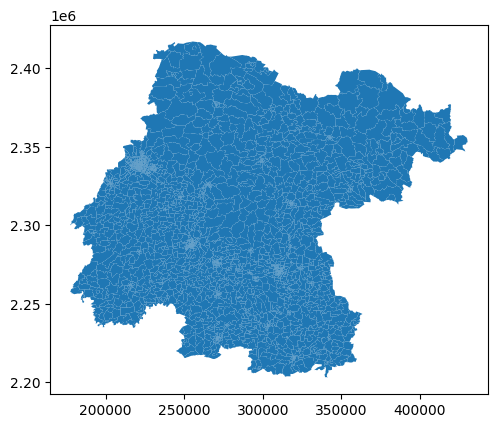

In [ ]:
# Plot the GeoDataFrame with a specified aspect ratio
secciones_gto.plot(aspect=1)

# Comenzar a trabajar con GeoJson

Este código utiliza Python para cargar, filtrar y convertir datos geográficos en un archivo Excel, lo que es especialmente útil para investigadores en ciencias sociales que trabajan con datos espaciales.

In [ ]:
secciones_gto.to_file('secciones_gto.geojson', driver='GeoJSON')


In [ ]:
!pip install geopandas pandas openpyxl


In [ ]:
import geopandas as gpd
import pandas as pd

# Cargar el archivo GeoPackage o GeoDataFrame que ya extrajiste
secciones_gto = gpd.read_file('/content/SECCIONES_2024.gpkg', layer='SECCIONES_2024')

# Filtrar para Guanajuato si no lo has hecho aún
secciones_gto = secciones_gto[secciones_gto['ENTIDAD'] == 11]

# Convertir el GeoDataFrame a DataFrame eliminando la columna de geometría si no es necesaria
secciones_gto_df = pd.DataFrame(secciones_gto.drop(columns='geometry'))

# Guardar en Excel
secciones_gto_df.to_excel('secciones_gto.xlsx', index=False)

# Si estás en Colab, puedes descargar el archivo con:
from google.colab import files
files.download('secciones_gto.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Vizualización**

Este código utiliza Python y las bibliotecas geopandas y matplotlib para crear un mapa visual de las secciones electorales de Guanajuato, incluyendo etiquetas para cada sección.

In [ ]:
!pip install geopandas matplotlib


<ipython-input-8-7174f647c288>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(secciones_gto.geometry.centroid.x, secciones_gto.geometry.centroid.y, secciones_gto['SECCION']):


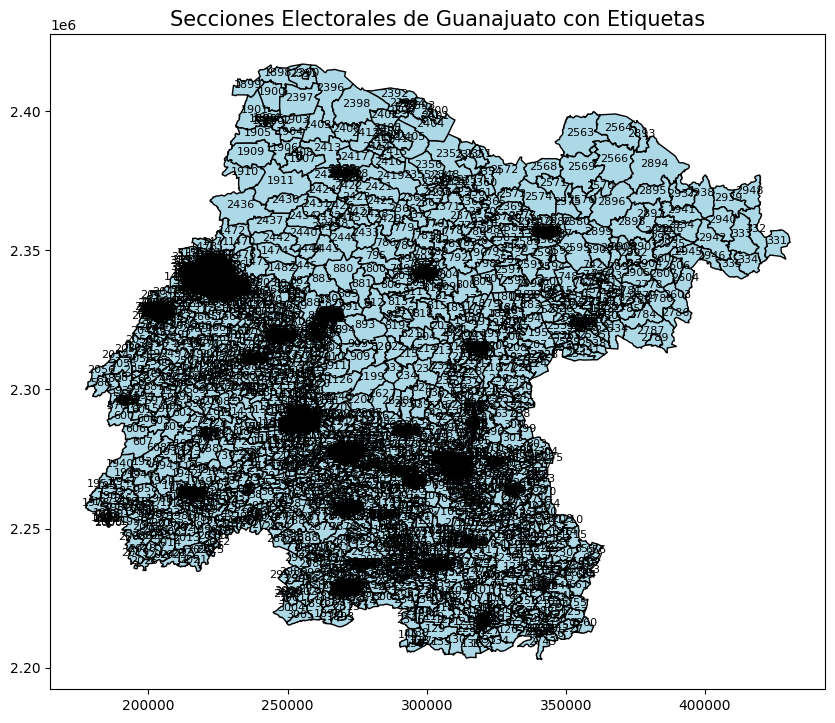

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo GeoPackage o GeoDataFrame filtrado
secciones_gto = gpd.read_file('/content/SECCIONES_2024.gpkg', layer='SECCIONES_2024')

# Filtrar para Guanajuato si no lo has hecho aún
secciones_gto = secciones_gto[secciones_gto['ENTIDAD'] == 11]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar las secciones
#The aspect parameter was added to set the aspect ratio to 1
secciones_gto.plot(ax=ax, color='lightblue', edgecolor='black', aspect=1)

# Añadir las etiquetas de las secciones (puedes cambiar 'SECCION' si la columna se llama diferente)
for x, y, label in zip(secciones_gto.geometry.centroid.x, secciones_gto.geometry.centroid.y, secciones_gto['SECCION']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

# Título del mapa
plt.title('Secciones Electorales de Guanajuato con Etiquetas', fontsize=15)

# Mostrar el mapa
plt.show()

**Guardar mapa**

In [ ]:
fig.savefig('mapa_secciones_guanajuato.png', dpi=300)
from google.colab import files
files.download('mapa_secciones_guanajuato.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Este código carga datos geográficos, filtra las secciones electorales de Guanajuato, crea un mapa visual con etiquetas y guarda el mapa como una imagen de alta resolución.

# **Seleccionar ciertos municipios**

Este código carga datos geográficos, filtra secciones electorales específicas de dos municipios en Guanajuato (municipios 2 y 46) y crea un mapa visual con etiquetas para cada sección.

<ipython-input-10-e149981f0c5c>:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(secciones_gto_filtered.geometry.centroid.x, secciones_gto_filtered.geometry.centroid.y, secciones_gto_filtered['SECCION']):


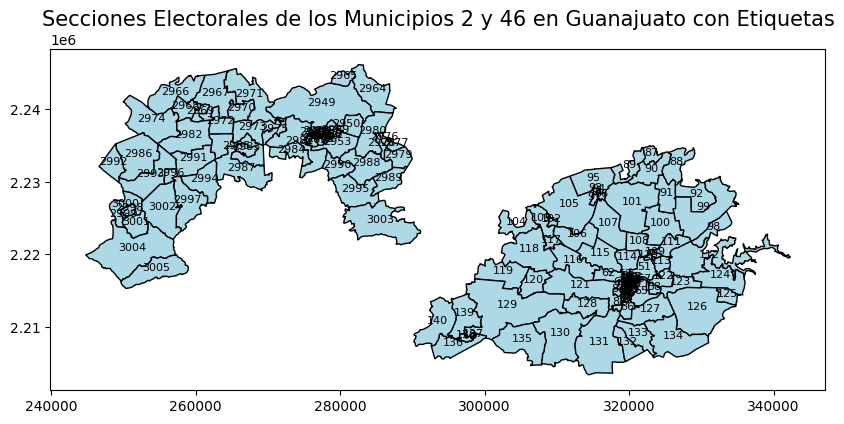

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo GeoPackage o GeoDataFrame filtrado
secciones_gto = gpd.read_file('/content/SECCIONES_2024.gpkg', layer='SECCIONES_2024')

# Filtrar para Guanajuato y luego para los Municipios 2 y 46
secciones_gto_filtered = secciones_gto[(secciones_gto['ENTIDAD'] == 11) & (secciones_gto['MUNICIPIO'].isin([2, 46]))]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar las secciones de los municipios seleccionados
secciones_gto_filtered.plot(ax=ax, color='lightblue', edgecolor='black')

# Añadir las etiquetas de las secciones
for x, y, label in zip(secciones_gto_filtered.geometry.centroid.x, secciones_gto_filtered.geometry.centroid.y, secciones_gto_filtered['SECCION']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

# Título del mapa
plt.title('Secciones Electorales de los Municipios 2 y 46 en Guanajuato con Etiquetas', fontsize=15)

# Mostrar el mapa
plt.show()
